In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

checking datatype and missing values: no missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df['Time_diff'] = df['Time'].diff()

In [9]:
df.loc[:, ['Time', 'Time_diff']].head(10)

,Time,Time_diff
0,0.0,NaN
1,0.0,0.0
2,1.0,1.0
3,1.0,0.0
4,2.0,1.0
5,2.0,0.0
6,4.0,2.0
7,7.0,3.0
8,7.0,0.0
9,9.0,2.0


In [10]:
df.fillna(value = 0, inplace=True)

In [11]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.102081
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,-0.008074
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289,0.024858
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961,0.019989
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447,0.039772
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974,0.020337
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643,0.007611
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257,-0.002922
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875,-0.011406
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e

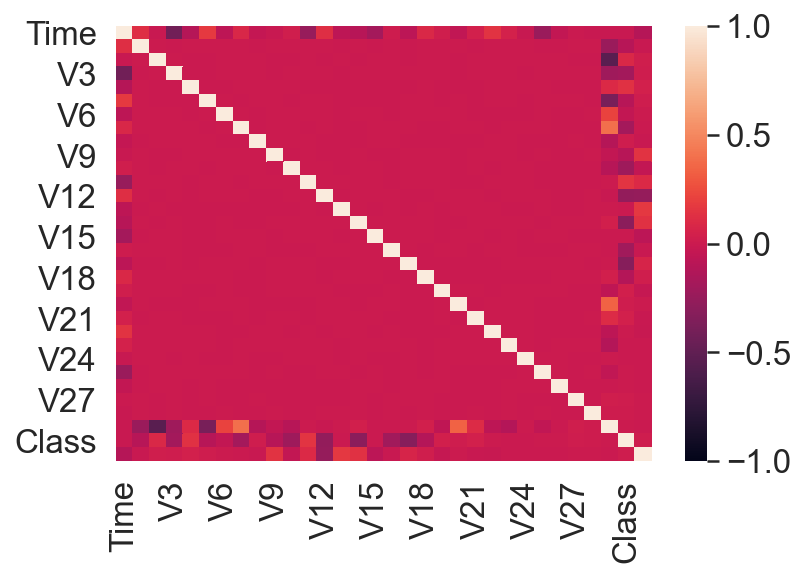

In [12]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1)
plt.show()

In [13]:
df.loc[:,['Time','Time_diff', 'Amount', 'V1', 'V2', 'Class']].corr()

,Time,Time_diff,Amount,V1,V2,Class
Time,1.000000,-0.102081,-0.010596,1.173963e-01,-1.059333e-02,-0.012323
Time_diff,-0.102081,1.000000,-0.006227,-8.073963e-03,2.485767e-02,0.018983
Amount,-0.010596,-0.006227,1.000000,-2.277087e-01,-5.314089e-01,0.005632
V1,0.117396,-0.008074,-0.227709,1.000000e+00,4.697350e-17,-0.101347
V2,-0.010593,0.024858,-0.531409,4.697350e-17,1.000000e+00,0.091289
Class,-0.012323,0.018983,0.005632,-1.013473e-01,9.128865e-02,1.000000


In [14]:
df.iloc[:, [0,1,2,-3,-2,-1]].corr()

,Time,V1,V2,Amount,Class,Time_diff
Time,1.000000,1.173963e-01,-1.059333e-02,-0.010596,-0.012323,-0.102081
V1,0.117396,1.000000e+00,4.697350e-17,-0.227709,-0.101347,-0.008074
V2,-0.010593,4.697350e-17,1.000000e+00,-0.531409,0.091289,0.024858
Amount,-0.010596,-2.277087e-01,-5.314089e-01,1.000000,0.005632,-0.006227
Class,-0.012323,-1.013473e-01,9.128865e-02,0.005632,1.000000,0.018983
Time_diff,-0.102081,-8.073963e-03,2.485767e-02,-0.006227,0.018983,1.000000


In [15]:
df.corr().loc[:,'Class'].sort_values()

V17         -0.326481
V14         -0.302544
V12         -0.260593
V10         -0.216883
V16         -0.196539
V3          -0.192961
V7          -0.187257
V18         -0.111485
V1          -0.101347
V9          -0.097733
V5          -0.094974
V6          -0.043643
Time        -0.012323
V24         -0.007221
V13         -0.004570
V15         -0.004223
V23         -0.002685
V22          0.000805
V25          0.003308
V26          0.004455
Amount       0.005632
V28          0.009536
V27          0.017580
Time_diff    0.018983
V8           0.019875
V20          0.020090
V19          0.034783
V21          0.040413
V2           0.091289
V4           0.133447
V11          0.154876
Class        1.000000
Name: Class, dtype: float64

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.606699
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,1.053380
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,1.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,32.000000


In [204]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_diff'],
      dtype='object')

In [208]:
df[df.duplicated(subset=df.columns[1:-1])==True].shape

(9144, 31)

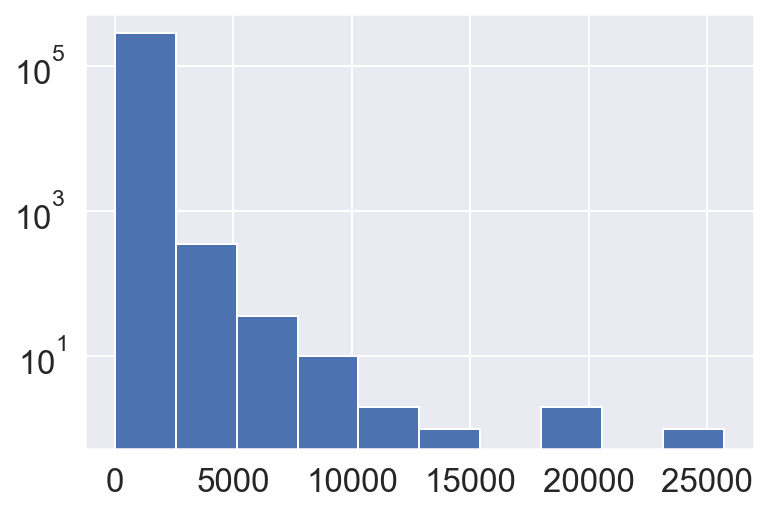

In [17]:
plt.hist(df['Amount'])
plt.yscale('log')
plt.show()

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

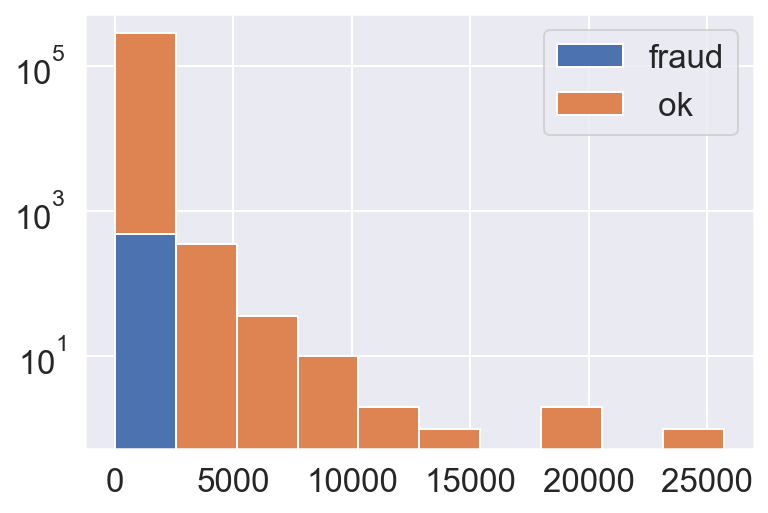

In [20]:
plt.hist(x = [df[df['Class']==1]['Amount'], df[df['Class']==0]['Amount']],bins=10, stacked=True, label = ['fraud', ' ok'])
plt.yscale('log')
plt.legend(loc='best')
plt.show()

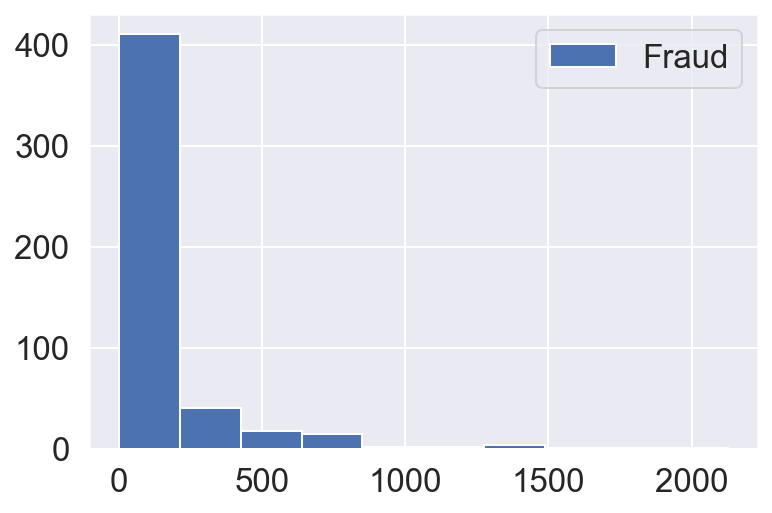

In [21]:
plt.hist(x = df[df['Class']==1]['Amount'],bins=10, label = 'Fraud')
plt.legend(loc = 'best')
plt.show()

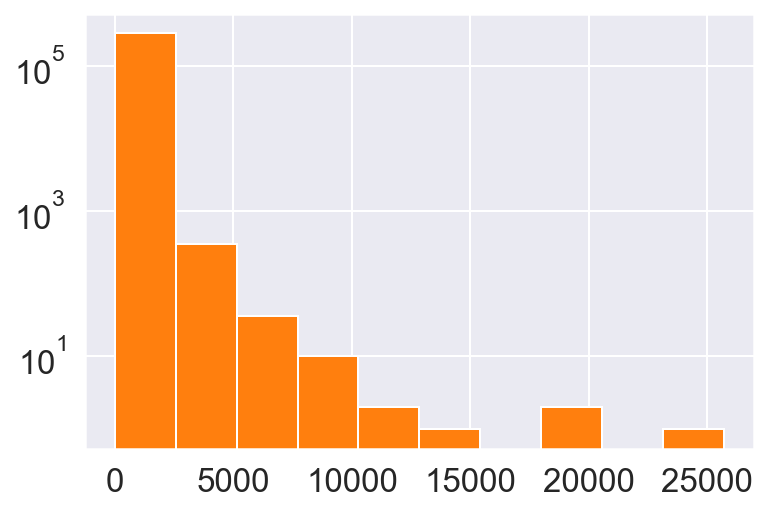

In [22]:
plt.hist(x = df[df['Class']==0]['Amount'],bins=10, color='tab:orange')
plt.yscale('log')
plt.show()

In [23]:
y = df.pop('Class')

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [25]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=42, stratify =y )

In [26]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [28]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

# Logistic Regression - base sample

In [30]:
logreg=LogisticRegression(penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

In [31]:
gs_dict={'C': [10**(-i) for i in range(5)] +[10**j for j in range(5)]}

## Grid search on accuracy

In [32]:
gs_logreg_base_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [33]:
#gs_logreg_base_acc.get_params()

In [34]:
gs_logreg_base_acc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [35]:
gs_logreg_base_acc.best_estimator_

LogisticRegression(C=1, max_iter=10000, random_state=42)

In [36]:
gs_logreg_base_acc.best_score_

0.9992056002984485

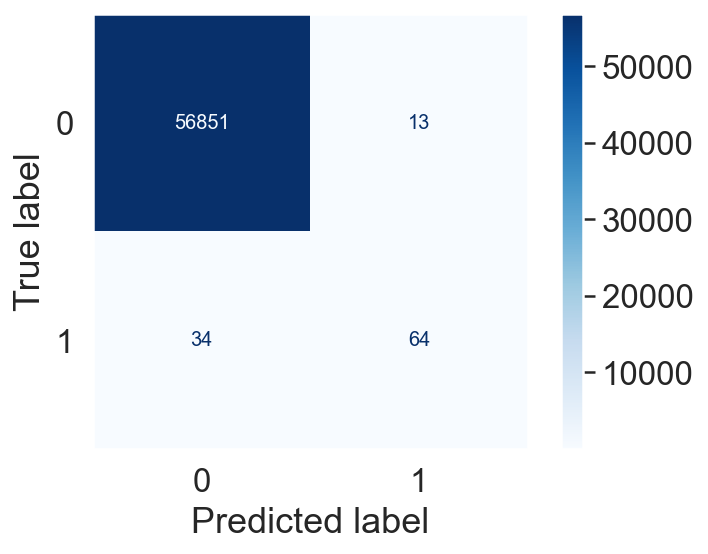

In [37]:
plot_confusion_matrix(gs_logreg_base_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

In [38]:
print(classification_report(y_test, gs_logreg_base_acc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Grid search on recall

In [39]:
gs_logreg_base_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [40]:
gs_logreg_base_rec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [41]:
gs_logreg_base_rec.best_estimator_

LogisticRegression(C=1, max_iter=10000, random_state=42)

In [42]:
gs_logreg_base_rec.best_score_

0.6318403115871469

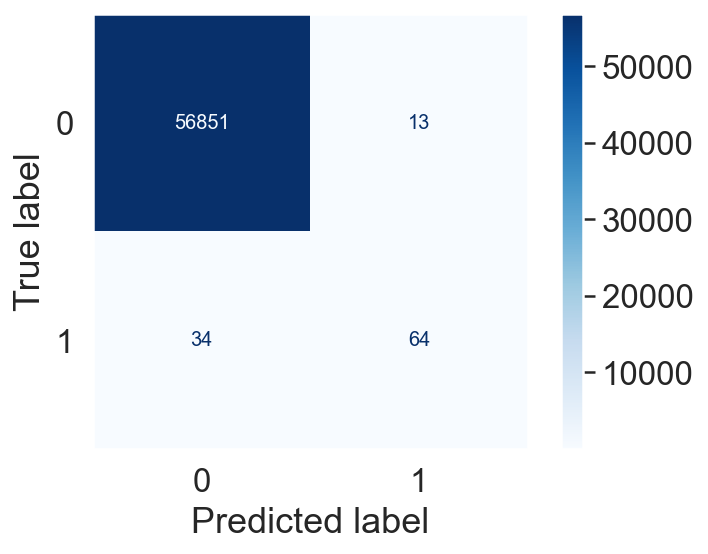

In [43]:
plot_confusion_matrix(gs_logreg_base_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [44]:
gs_logreg_base_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [45]:
gs_logreg_base_prec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='precision')

In [46]:
gs_logreg_base_prec.best_estimator_

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

In [47]:
gs_logreg_base_prec.best_score_

0.894162393162393

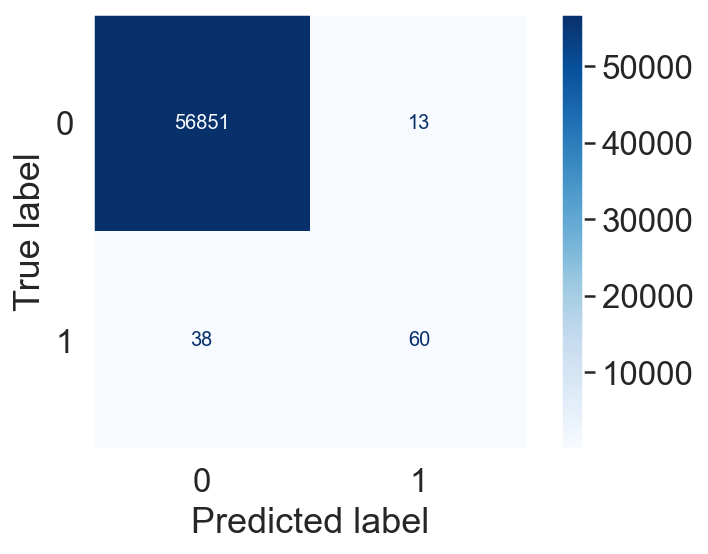

In [48]:
plot_confusion_matrix(gs_logreg_base_prec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

# Undersampling

In [49]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=42)

In [50]:
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [51]:
X_train.shape

(227845, 31)

In [52]:
y_train.shape

(227845,)

In [53]:
X_train_under.shape

(788, 31)

In [54]:
y_train_under.shape

(788,)

## Grid search on accuracy

In [55]:
gs_logreg_under_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [56]:
gs_logreg_under_acc.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [57]:
gs_logreg_under_acc.best_estimator_

LogisticRegression(C=0.1, max_iter=10000, random_state=42)

In [58]:
gs_logreg_under_acc.best_score_

0.9454486817705394

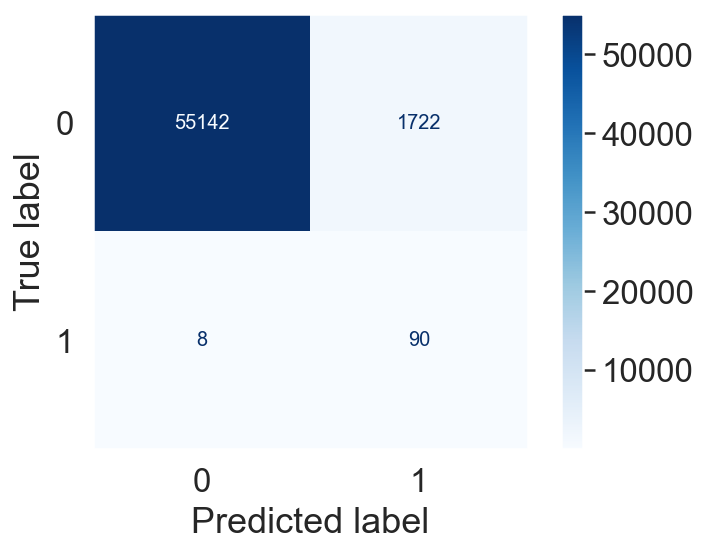

In [59]:
plot_confusion_matrix(gs_logreg_under_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on recall

In [60]:
gs_logreg_under_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [61]:
gs_logreg_under_rec.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [62]:
gs_logreg_under_rec.best_estimator_

LogisticRegression(C=10000, max_iter=10000, random_state=42)

In [63]:
gs_logreg_under_rec.best_score_

0.9365141187925998

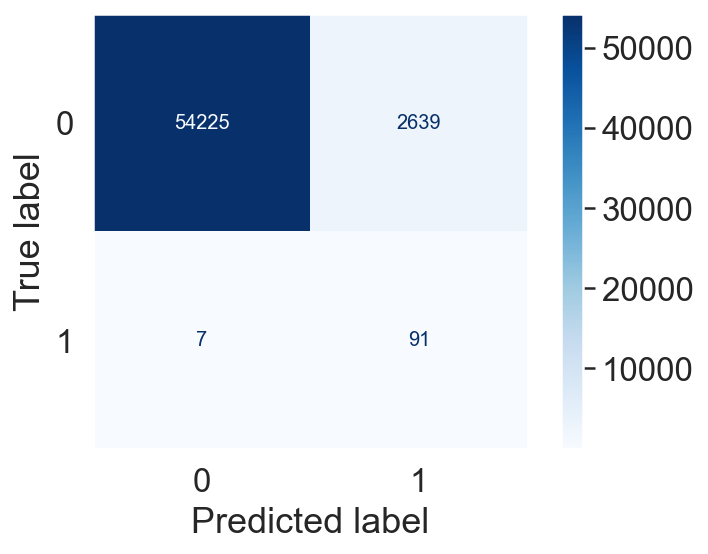

In [64]:
plot_confusion_matrix(gs_logreg_under_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [65]:
gs_logreg_under_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [66]:
gs_logreg_under_prec.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='precision')

In [67]:
gs_logreg_under_prec.best_estimator_

LogisticRegression(C=0.001, max_iter=10000, random_state=42)

In [68]:
gs_logreg_under_prec.best_params_

{'C': 0.001}

In [69]:
gs_logreg_under_prec.best_score_

1.0

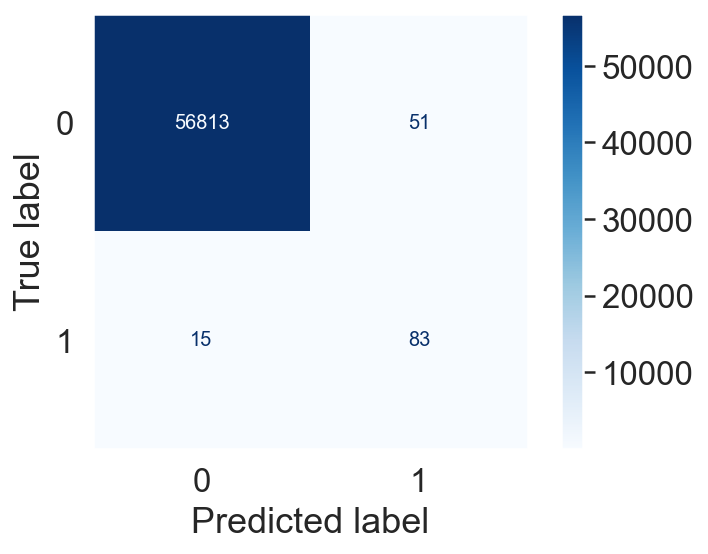

In [70]:
plot_confusion_matrix(gs_logreg_under_prec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

In [209]:
logreg_under_spec=LogisticRegression(C=0.0001, random_state=42,max_iter=10000)

In [210]:
logreg_under_spec.fit(X_train_under, y_train_under)

LogisticRegression(C=0.0001, max_iter=10000, random_state=42)

In [211]:
cross_val_score(logreg_under_spec, X_train_under, y_train_under, cv=5, scoring='recall')

array([0.73417722, 0.81012658, 0.79746835, 0.78205128, 0.81012658])

In [212]:
cross_val_score(logreg_under_spec, X_train_under, y_train_under, cv=5, scoring='recall').mean()

0.7867900032456994

In [213]:
cross_val_score(logreg_under_spec, X_train_under, y_train_under, cv=5, scoring='precision').mean()

1.0

In [214]:
cross_val_score(logreg_under_spec, X_train_under, y_train_under, cv=5, scoring='accuracy').mean()

0.8934128839796823

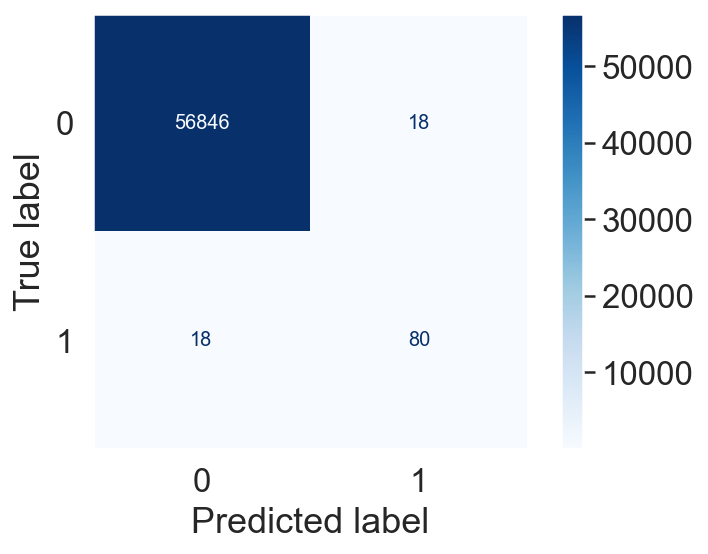

In [215]:
plot_confusion_matrix(logreg_under_spec, X_test, y_test,cmap='Blues')
plt.grid(b=None)

1.0


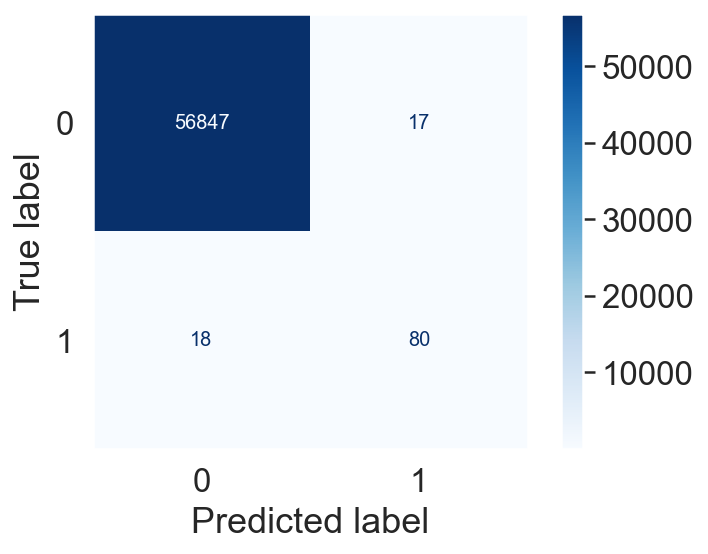

In [87]:
logreg_under_prec_fixC=LogisticRegression(C=0.00001, random_state=42 , max_iter=10000)

logreg_under_prec_fixC.fit(X_train_under, y_train_under)
print(cross_val_score(logreg_under_prec_fixC, X_train_under, y_train_under, cv=5, scoring='precision').mean())

plot_confusion_matrix(logreg_under_prec_fixC, X_test, y_test, cmap='Blues')
plt.grid(b=None)

In [88]:
print(classification_report(y_test, logreg_under_prec_fixC.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
c_values = np.linspace(0.0001, 0.000001, 20)

In [90]:
c_values=np.append(c_values, [0.00001])

In [91]:
c_values

array([1.00000000e-04, 9.47894737e-05, 8.95789474e-05, 8.43684211e-05,
       7.91578947e-05, 7.39473684e-05, 6.87368421e-05, 6.35263158e-05,
       5.83157895e-05, 5.31052632e-05, 4.78947368e-05, 4.26842105e-05,
       3.74736842e-05, 3.22631579e-05, 2.70526316e-05, 2.18421053e-05,
       1.66315789e-05, 1.14210526e-05, 6.21052632e-06, 1.00000000e-06,
       1.00000000e-05])

In [92]:
gs_logreg_under_tune_dict = {'C': c_values}

In [93]:
gs_logreg_under_tune=GridSearchCV(logreg,gs_logreg_under_tune_dict, scoring='f1', cv=5)

In [94]:
gs_logreg_under_tune.fit(X_train_under, y_train_under)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': array([1.00000000e-04, 9.47894737e-05, 8.95789474e-05, 8.43684211e-05,
       7.91578947e-05, 7.39473684e-05, 6.87368421e-05, 6.35263158e-05,
       5.83157895e-05, 5.31052632e-05, 4.78947368e-05, 4.26842105e-05,
       3.74736842e-05, 3.22631579e-05, 2.70526316e-05, 2.18421053e-05,
       1.66315789e-05, 1.14210526e-05, 6.21052632e-06, 1.00000000e-06,
       1.00000000e-05])},
             scoring='f1')

In [95]:
gs_logreg_under_tune.best_estimator_

LogisticRegression(C=0.0001, max_iter=10000, random_state=42)

In [96]:
gs_logreg_under_tune.best_params_

{'C': 0.0001}

In [97]:
gs_logreg_under_tune.best_score_

0.8803893808131068

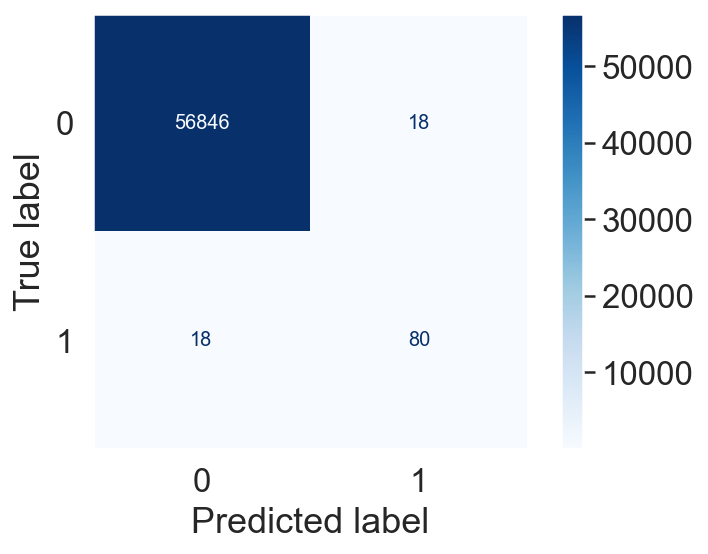

In [98]:
plot_confusion_matrix(gs_logreg_under_tune, X_test, y_test, cmap='Blues')
plt.grid(b=None)

In [99]:
print(classification_report(y_test, gs_logreg_under_tune.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# Oversampling

In [100]:
oversampler = RandomOverSampler(sampling_strategy=1, random_state=42)

In [101]:
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [102]:
X_train.shape

(227845, 31)

In [103]:
y_train.shape

(227845,)

In [104]:
X_train_over.shape

(454902, 31)

In [105]:
y_train_over.shape

(454902,)

## Grid search on accuracy

In [106]:
gs_logreg_over_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [107]:
gs_logreg_over_acc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [108]:
gs_logreg_over_acc.best_estimator_

LogisticRegression(C=0.001, max_iter=10000, random_state=42)

In [109]:
gs_logreg_over_acc.best_score_

0.9507344434803555

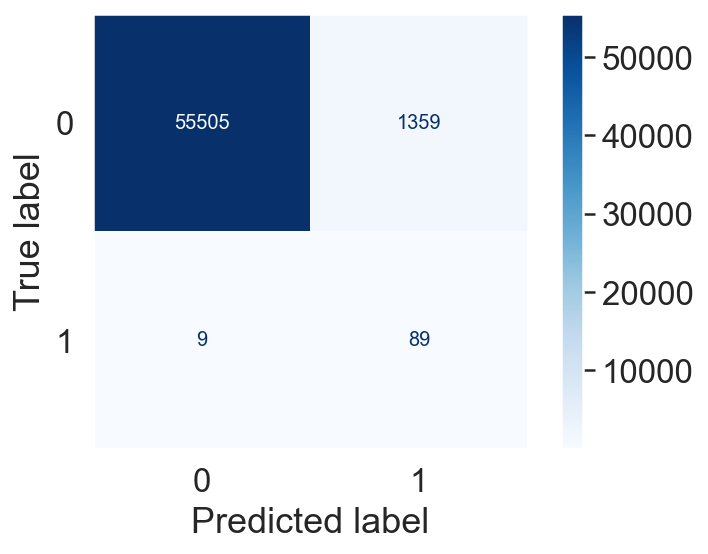

In [110]:
plot_confusion_matrix(gs_logreg_over_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on recall

In [111]:
gs_logreg_over_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [112]:
gs_logreg_over_rec.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [113]:
gs_logreg_over_rec.best_estimator_

LogisticRegression(C=1, max_iter=10000, random_state=42)

In [114]:
gs_logreg_over_rec.best_score_

0.9244760362905591

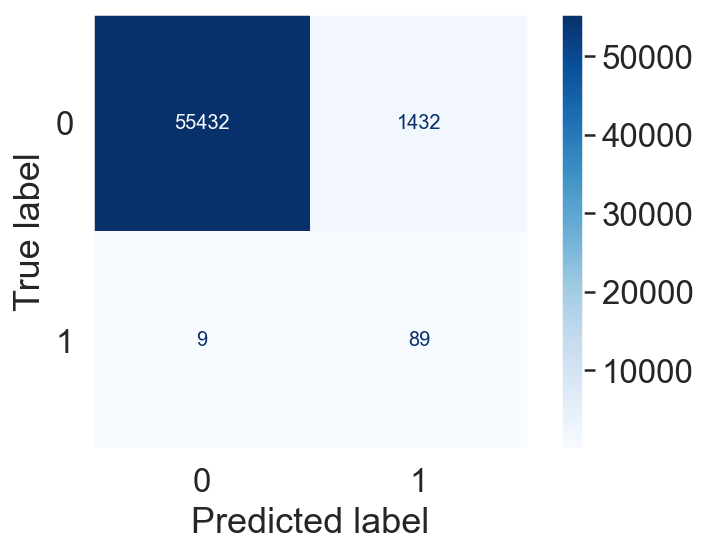

In [115]:
plot_confusion_matrix(gs_logreg_over_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [116]:
gs_logreg_over_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [117]:
gs_logreg_over_prec.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='precision')

In [118]:
gs_logreg_over_prec.best_estimator_

LogisticRegression(C=0.0001, max_iter=10000, random_state=42)

In [119]:
gs_logreg_over_prec.best_score_

0.9818081324207348

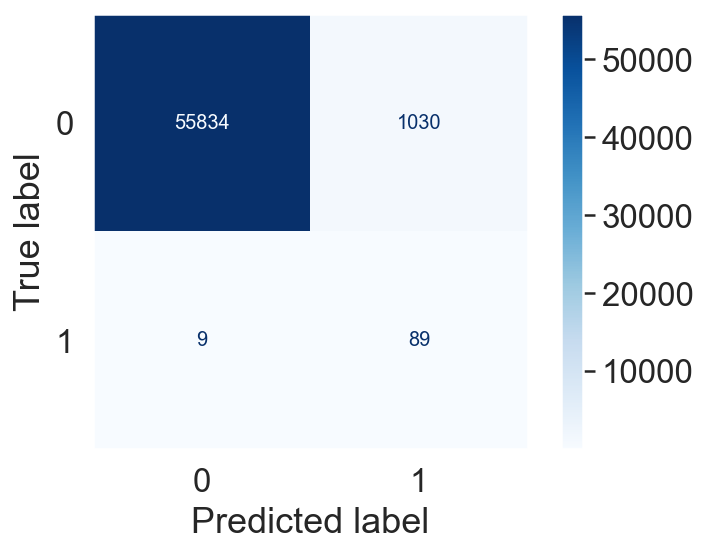

In [120]:
plot_confusion_matrix(gs_logreg_over_prec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

# SMOTE

In [121]:
smote_sampler = SMOTE(sampling_strategy=1, random_state=42)

In [122]:
X_train_smote, y_train_smote = smote_sampler.fit_resample(X_train, y_train)

In [123]:
X_train_smote.shape

(454902, 31)

In [124]:
X_train.shape

(227845, 31)

In [125]:
X_train_over.shape

(454902, 31)

In [126]:
y_train_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: Class, dtype: float64

## Grid search on accuracy

In [127]:
gs_logreg_smote_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [128]:
gs_logreg_smote_acc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [129]:
gs_logreg_smote_acc.best_estimator_

LogisticRegression(C=1000, max_iter=10000, random_state=42)

In [130]:
gs_logreg_smote_acc.best_score_

0.9518269837061851

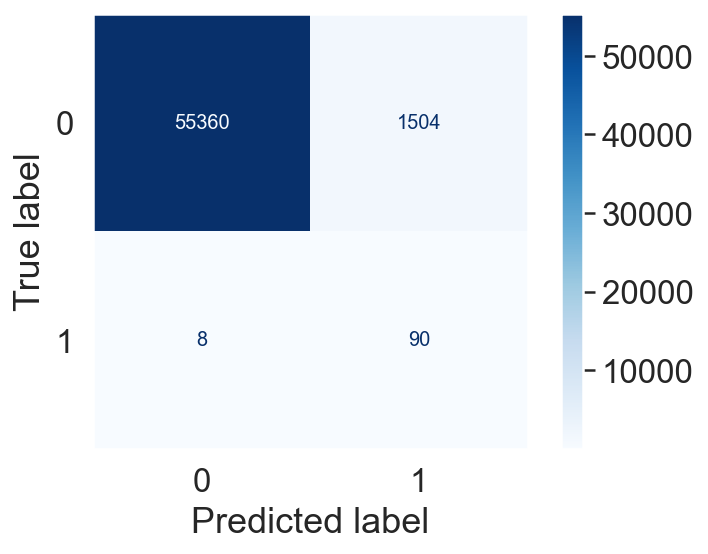

In [131]:
plot_confusion_matrix(gs_logreg_smote_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on recall

In [132]:
gs_logreg_over_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [133]:
gs_logreg_over_rec.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [134]:
gs_logreg_over_rec.best_estimator_

LogisticRegression(C=100, max_iter=10000, random_state=42)

In [135]:
gs_logreg_over_rec.best_score_

0.9307103402609467

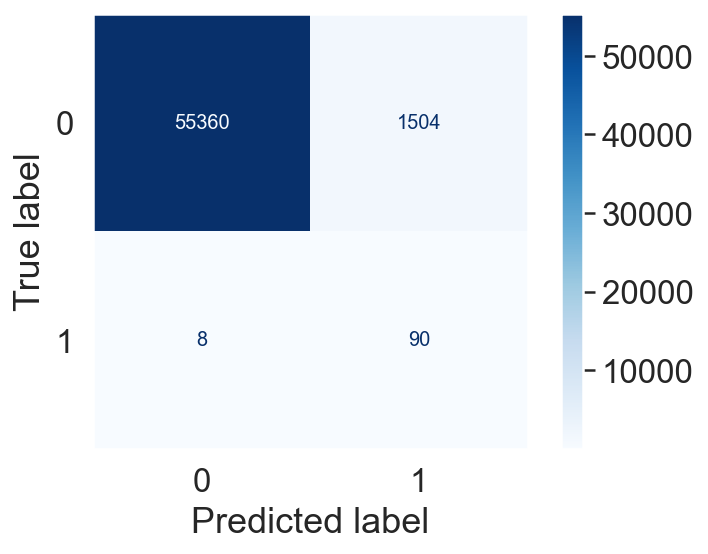

In [136]:
plot_confusion_matrix(gs_logreg_over_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [137]:
gs_logreg_over_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [138]:
gs_logreg_over_prec.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='precision')

In [139]:
gs_logreg_over_prec.best_estimator_

LogisticRegression(C=0.0001, max_iter=10000, random_state=42)

In [140]:
gs_logreg_over_prec.best_score_

0.9808176659042689

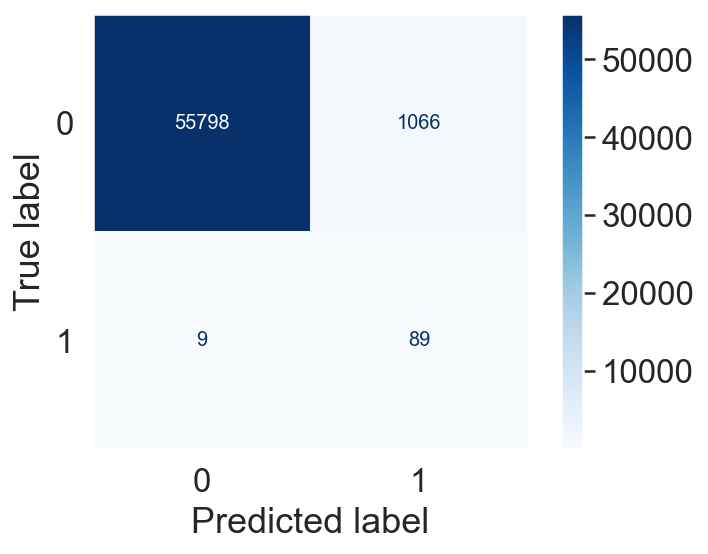

In [141]:
plot_confusion_matrix(gs_logreg_over_prec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

# Custom sampling

In [148]:
X_train.shape

(227845, 31)

In [149]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [150]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [151]:
1/9

0.1111111111111111

In [152]:
over_to10p=RandomOverSampler(sampling_strategy=0.1111111, random_state=42)

In [153]:
X_train_over10, y_train_over10=over_to10p.fit_resample(X_train, y_train)

In [154]:
X_train_over10.shape

(252723, 31)

In [155]:
y_train_over10.value_counts()

0    227451
1     25272
Name: Class, dtype: int64

In [156]:
y_train_over10.value_counts(normalize=True)

0    0.900001
1    0.099999
Name: Class, dtype: float64

In [157]:
undersample50=RandomUnderSampler(sampling_strategy=1, random_state=42)

In [158]:
X_train_custom, y_train_custom = undersample50.fit_resample(X_train_over10, y_train_over10)

In [159]:
X_train_custom.shape

(50544, 31)

In [160]:
y_train_custom.value_counts()

1    25272
0    25272
Name: Class, dtype: int64

## Grid search on accuracy

In [161]:
gs_logreg_custom1_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [162]:
gs_logreg_custom1_acc.fit(X_train_custom, y_train_custom)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [163]:
gs_logreg_custom1_acc.best_estimator_

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

In [164]:
gs_logreg_custom1_acc.best_score_

0.9496478608728764

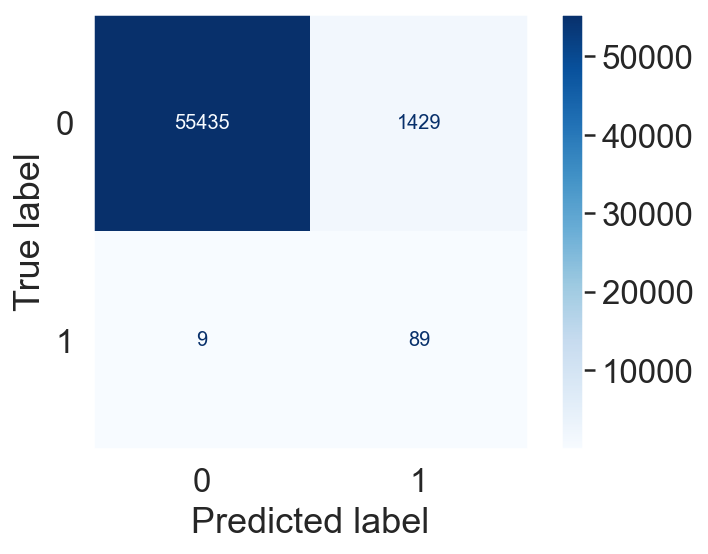

In [165]:
plot_confusion_matrix(gs_logreg_custom1_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on recall

In [166]:
gs_logreg_custom1_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [167]:
gs_logreg_custom1_rec.fit(X_train_custom, y_train_custom)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [168]:
gs_logreg_custom1_rec.best_estimator_

LogisticRegression(C=1, max_iter=10000, random_state=42)

In [169]:
gs_logreg_custom1_rec.best_score_

0.922285723679807

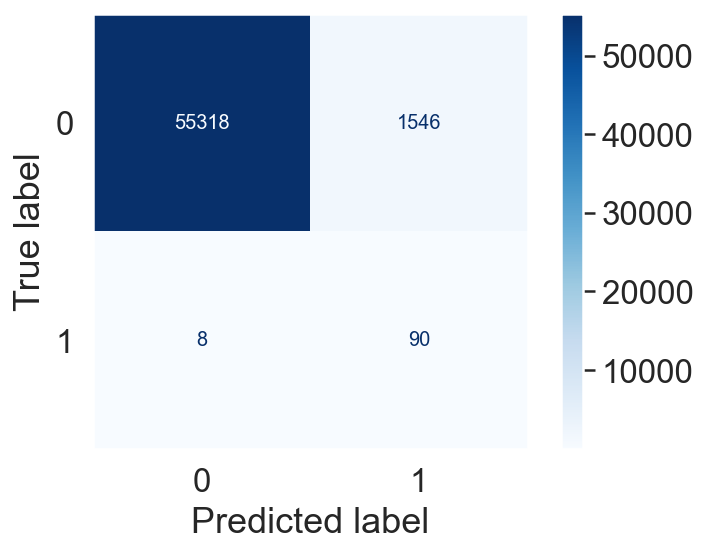

In [170]:
plot_confusion_matrix(gs_logreg_custom1_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [171]:
gs_logreg_custom1_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [216]:
gs_logreg_custom1_prec.fit(X_train_custom, y_train_custom)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='precision')

In [217]:
gs_logreg_custom1_prec.best_estimator_

LogisticRegression(C=0.0001, max_iter=10000, random_state=42)

In [218]:
gs_logreg_custom1_prec.best_score_

0.9921257350512308

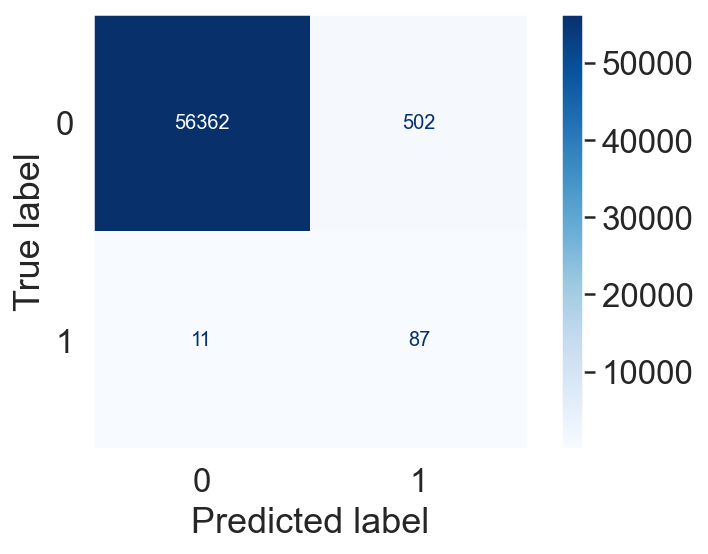

In [219]:
plot_confusion_matrix(gs_logreg_custom1_prec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

# Custom sampling 2

In [176]:
X_train.shape

(227845, 31)

In [177]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [178]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [179]:
1/99

0.010101010101010102

In [180]:
over_to1p=RandomOverSampler(sampling_strategy=0.010101010101010102, random_state=42)

In [181]:
X_train_over1, y_train_over1=over_to1p.fit_resample(X_train, y_train)

In [182]:
X_train_over1.shape

(229748, 31)

In [183]:
y_train_over1.value_counts()

0    227451
1      2297
Name: Class, dtype: int64

In [184]:
y_train_over1.value_counts(normalize=True)

0    0.990002
1    0.009998
Name: Class, dtype: float64

In [185]:
undersample50=RandomUnderSampler(sampling_strategy=1, random_state=42)

In [186]:
X_train_custom2, y_train_custom2 = undersample50.fit_resample(X_train_over1, y_train_over1)

In [187]:
X_train_custom2.shape

(4594, 31)

In [188]:
y_train_custom2.value_counts()

1    2297
0    2297
Name: Class, dtype: int64

## Grid search on accuracy

In [189]:
gs_logreg_custom2_acc=GridSearchCV(logreg, gs_dict, scoring='accuracy', cv=5, return_train_score=True )

In [190]:
gs_logreg_custom2_acc.fit(X_train_custom2, y_train_custom2)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='accuracy')

In [191]:
gs_logreg_custom2_acc.best_estimator_

LogisticRegression(C=1000, max_iter=10000, random_state=42)

In [192]:
gs_logreg_custom2_acc.best_score_

0.9510240125550885

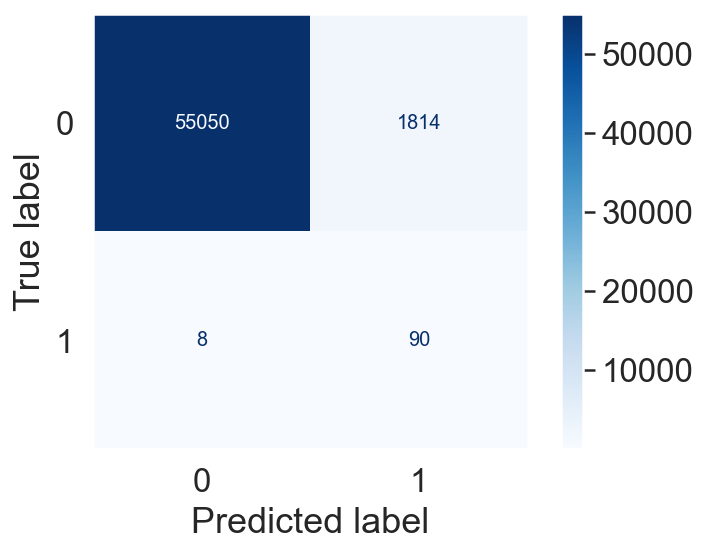

In [193]:
plot_confusion_matrix(gs_logreg_custom2_acc, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on recall

In [194]:
gs_logreg_custom2_rec=GridSearchCV(logreg, gs_dict, scoring='recall', cv=5, return_train_score=True )

In [195]:
gs_logreg_custom2_rec.fit(X_train_custom2, y_train_custom2)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [196]:
gs_logreg_custom2_rec.best_estimator_

LogisticRegression(C=10000, max_iter=10000, random_state=42)

In [197]:
gs_logreg_custom2_rec.best_score_

0.9268655868144359

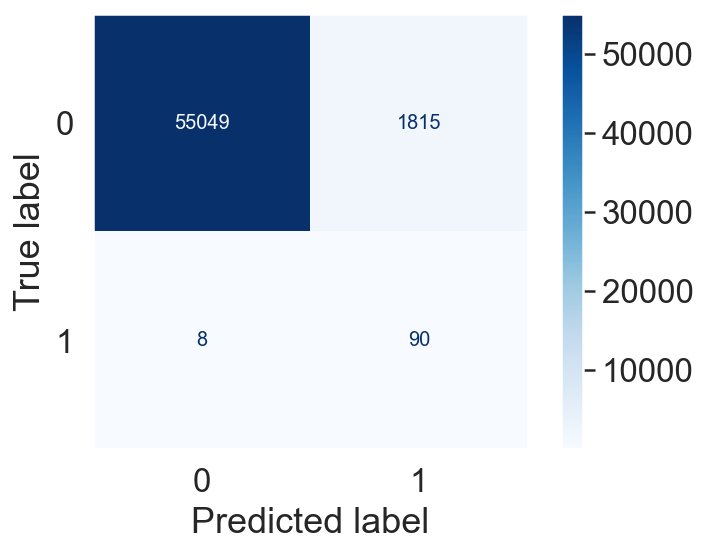

In [198]:
plot_confusion_matrix(gs_logreg_custom2_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)

## Grid search on precision

In [199]:
gs_logreg_custom2_prec=GridSearchCV(logreg, gs_dict, scoring='precision', cv=5, return_train_score=True )

In [200]:
gs_logreg_custom2_rec.fit(X_train_custom2, y_train_custom2)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [201]:
gs_logreg_custom2_rec.best_estimator_

LogisticRegression(C=10000, max_iter=10000, random_state=42)

In [202]:
gs_logreg_custom2_rec.best_score_

0.9268655868144359

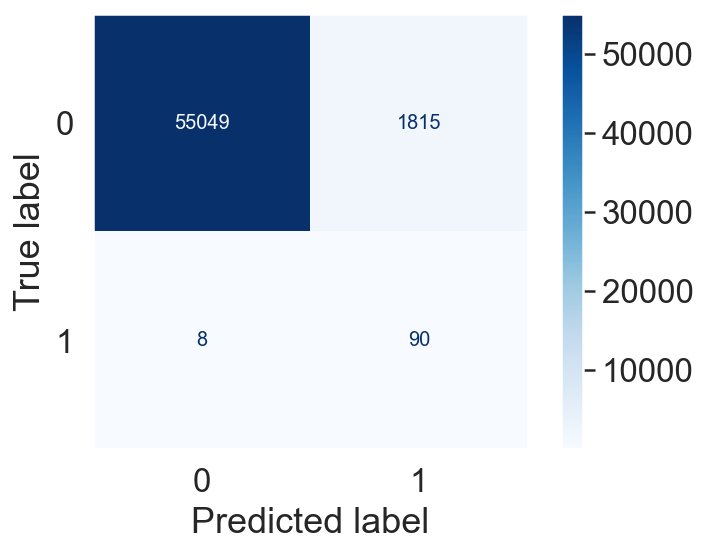

In [203]:
plot_confusion_matrix(gs_logreg_custom2_rec, X_test, y_test, cmap='Blues')
plt.grid(b=None)